In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

### 데이터 불러오기

In [3]:
df = pd.read_csv('Pizza Sales Dataset.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_day,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,Thursday,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,Thursday,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,Thursday,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,Thursday,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,Thursday,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_day', 'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

### 컬럼명 한국어로 바꾸기

In [14]:
df.rename(columns={
    'pizza_id': '피자 ID',
    'order_id': '주문 ID',
    'pizza_name_id': '피자 이름 ID',
    'quantity': '주문 수량',
    'order_date': '주문 날짜',
    'order_day': '주문 요일',
    'order_time': '주문 시간',
    'unit_price': '단가',
    'total_price': '총액',
    'pizza_size': '피자 사이즈',
    'pizza_category': '피자 종류',
    'pizza_ingredients': '피자 재료 목록',
    'pizza_name': '피자 이름'
}, inplace=True)

In [15]:
# 결측치 확인 : 없음
df.isna().sum()

피자 ID       0
주문 ID       0
피자 이름 ID    0
주문 수량       0
주문 날짜       0
주문 요일       0
주문 시간       0
단가          0
총액          0
피자 사이즈      0
피자 종류       0
피자 재료 목록    0
피자 이름       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   피자 ID     48620 non-null  int64  
 1   주문 ID     48620 non-null  int64  
 2   피자 이름 ID  48620 non-null  object 
 3   주문 수량     48620 non-null  int64  
 4   주문 날짜     48620 non-null  object 
 5   주문 요일     48620 non-null  object 
 6   주문 시간     48620 non-null  object 
 7   단가        48620 non-null  float64
 8   총액        48620 non-null  float64
 9   피자 사이즈    48620 non-null  object 
 10  피자 종류     48620 non-null  object 
 11  피자 재료 목록  48620 non-null  object 
 12  피자 이름     48620 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


### 분석 시작

In [22]:
# 중복 제거된 피자 이름과 재료 목록 추출
pizza_ingredients_count = df[['피자 이름', '피자 재료 목록']].drop_duplicates()

# 재료 수 계산
pizza_ingredients_count['재료 수'] = pizza_ingredients_count['피자 재료 목록'].apply(lambda x: len(x.split(',')))

# 재료 수 기준 내림차순 정렬
pizza_ingredients_count_sorted = pizza_ingredients_count.sort_values(by='재료 수', ascending=False)

# 전체 출력
print(pizza_ingredients_count_sorted.to_string(index=False))


                                     피자 이름                                                                                          피자 재료 목록  재료 수
                        The Mexicana Pizza       Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic     8
                 The Spinach Supreme Pizza      Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garlic, Asiago Cheese     8
               The Southwest Chicken Pizza      Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce     8
         The Vegetables + Vegetables Pizza            Mushrooms, Tomatoes, Red Peppers, Green Peppers, Red Onions, Zucchini, Spinach, Garlic     8
              The California Chicken Pizza               Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese     7
                   The Mediterranean Pizza  Spinach, Artichokes, Kalamata Olives, Sun-dried Tomatoes, Feta Cheese, Plu

C:\Users\jun09\AppData\Local\Temp\ipykernel_2604\1809881384.py:14: UserWarning: Glyph 129474 (\N{SALT SHAKER}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\jun09\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129474 (\N{SALT SHAKER}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


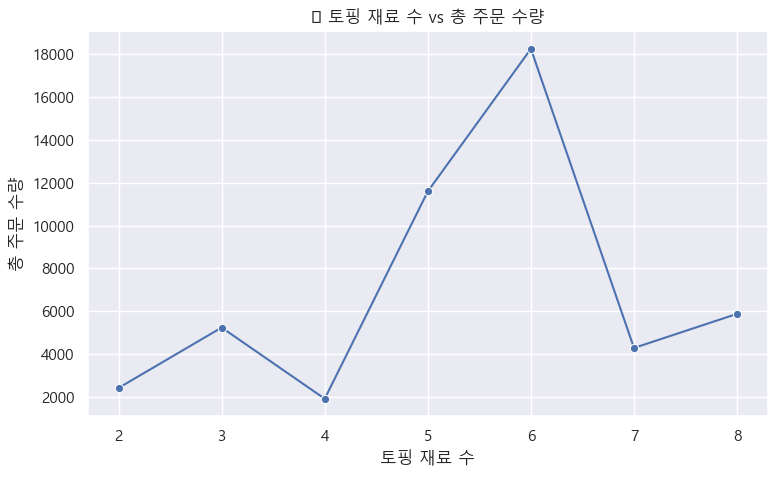

In [35]:
# ✅ 재료 수 계산 (쉼표 기준 split해서 개수 세기)
df['재료 수'] = df['피자 재료 목록'].apply(lambda x: len(x.split(',')))

# ✅ 재료 수별 총 주문 수량 계산
ingredient_group_total = df.groupby('재료 수')['주문 수량'].sum().reset_index()

# ✅ 시각화
plt.figure(figsize=(8, 5))
sns.lineplot(data=ingredient_group_total, x='재료 수', y='주문 수량', marker='o')
plt.title('🧂 토핑 재료 수 vs 총 주문 수량')
plt.xlabel('토핑 재료 수')
plt.ylabel('총 주문 수량')
plt.grid(True)
plt.tight_layout()
plt.show()


🧂 인사이트: 토핑 재료 수와 주문량 관계 분석
📈 관찰 요약
재료 수가 4~6개인 피자가 가장 많은 주문량을 기록함.

재료 수가 2~3개인 단순한 피자는 주문량이 적은 편.

7개 이상 재료를 가진 피자는 개수는 적지만 상대적으로 높은 주문량을 기록하는 경우도 존재함.

🔍 분석 포인트
재료 수	주문 수량 특성	해석
1~3개	낮은 주문 수량	지나치게 단순한 메뉴는 선호도가 낮음
4~6개	주문량 최고 구간	맛의 다양성과 적절한 가격대의 균형 가능성
7개 이상	다소 줄어드는 추세 or 소수 인기	프리미엄 포지션의 가능성, 다만 너무 복잡한 재료는 호불호 존재

💡 마케팅 & 제품 전략 제안
✅ 메인 메뉴군은 4~6개 재료를 사용하는 피자로 구성

→ 예: 베스트셀러, 추천메뉴, 세트 구성용

✅ 단순 피자는 1인 런치용 소형 사이즈로 리포지셔닝

→ 예: 저가 간편식, 배달 전용 메뉴

✅ 7개 이상 재료의 피자는 프리미엄 라인업으로 별도 강조

→ 예: “쉐프 스페셜”, “고급 토핑 한정 메뉴” 등

✨ 활용 방안
신메뉴 개발 시 재료 개수 타겟 범위는 4~6개로 설정

재료 수에 따른 제작 원가, 소비자 인식, 프로모션 전략 연계 가능

향후 재료 조합별 만족도 조사 또는 리뷰 기반 정성 분석도 고려 가능

In [37]:
# 피자 이름별로 고정 단가와 총 주문 수량 추출
pizza_price_quantity = df.groupby('피자 이름').agg({
    '단가': 'first',         # 고정 단가
    '주문 수량': 'sum'       # 총 주문 수량
}).reset_index()

# 총 주문 수 기준 내림차순 정렬
pizza_price_quantity_sorted = pizza_price_quantity.sort_values(by='주문 수량', ascending=False)

# 표 출력
print(pizza_price_quantity_sorted.to_string(index=False))



                                     피자 이름    단가  주문 수량
                  The Classic Deluxe Pizza 16.00   2453
                The Barbecue Chicken Pizza 12.75   2432
                        The Hawaiian Pizza 13.25   2422
                       The Pepperoni Pizza 15.25   2418
                    The Thai Chicken Pizza 20.75   2371
              The California Chicken Pizza 20.75   2370
                        The Sicilian Pizza 20.25   1938
                   The Spicy Italian Pizza 20.75   1924
               The Southwest Chicken Pizza 20.75   1917
                        The Big Meat Pizza 12.00   1914
                     The Four Cheese Pizza 17.95   1902
                 The Italian Supreme Pizza 20.75   1884
         The Vegetables + Vegetables Pizza 12.00   1526
                        The Mexicana Pizza 16.00   1484
                      The Napolitana Pizza 12.00   1464
          The Prosciutto and Arugula Pizza 20.75   1457
                The Spinach and Feta Pizza 20.25

In [38]:
# 단가 구간 분류 함수
def 가격_구간(가격):
    if 가격 <= 14.99:
        return '저가 (≤ $14.99)'
    elif 15.00 <= 가격 <= 19.99:
        return '중가 ($15.00 ~ $19.99)'
    else:
        return '고가 (≥ $20.00)'

# 단가 기준으로 구간 분류 컬럼 추가
df['가격 구간'] = df['단가'].apply(가격_구간)

# 각 가격 구간별 총 주문 수량 계산
price_group_summary = df.groupby('가격 구간')['주문 수량'].sum().reset_index()

# 보기 좋게 가격 구간 정렬
price_group_summary = price_group_summary.sort_values(by='주문 수량', ascending=False)

# 결과 확인
print(price_group_summary.to_string(index=False))


               가격 구간  주문 수량
중가 ($15.00 ~ $19.99)  17986
       저가 (≤ $14.99)  16318
       고가 (≥ $20.00)  15270


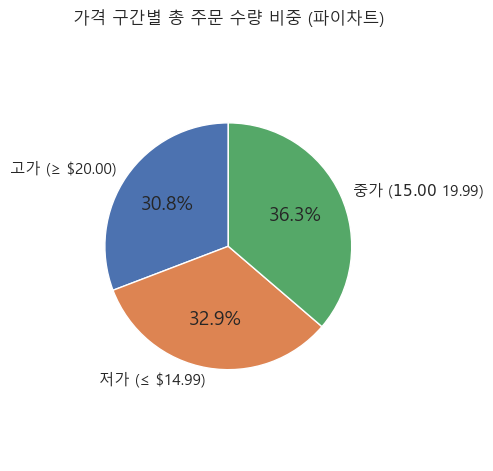

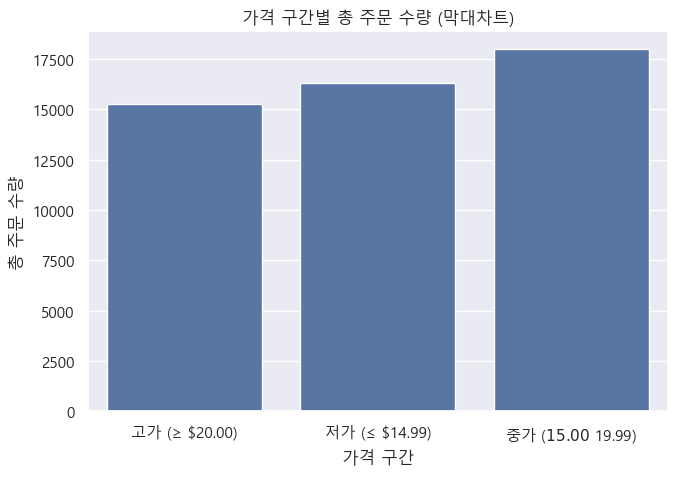

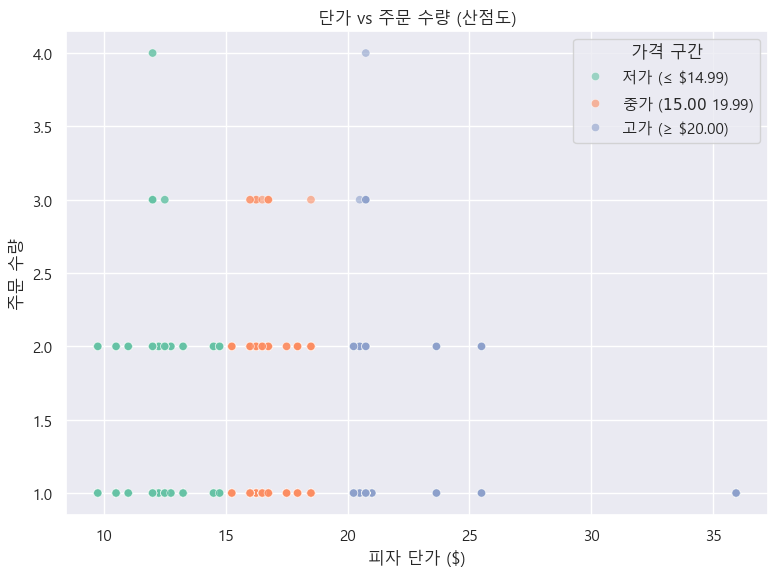

In [ ]:
# 3. 구간별 **총 주문 수량** 집계 (막대차트용으로도 동일하게 사용)
price_group_summary = df.groupby('가격 구간')['주문 수량'].sum().reset_index()

# --------------- 그래프 1: 파이차트 ----------------
plt.figure(figsize=(5, 5))
plt.pie(price_group_summary['주문 수량'], labels=price_group_summary['가격 구간'],
        autopct='%1.1f%%', startangle=90)
plt.title('가격 구간별 총 주문 수량 비중 (파이차트)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# --------------- 그래프 2: 막대차트 ----------------
plt.figure(figsize=(7, 5))
sns.barplot(data=price_group_summary, x='가격 구간', y='주문 수량')
plt.title('가격 구간별 총 주문 수량 (막대차트)')
plt.xlabel('가격 구간')
plt.ylabel('총 주문 수량')
plt.tight_layout()
plt.show()

# --------------- 그래프 3: 산점도 ----------------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='단가', y='주문 수량', hue='가격 구간', palette='Set2', alpha=0.6)
plt.title('단가 vs 주문 수량 (산점도)')
plt.xlabel('피자 단가 ($)')
plt.ylabel('주문 수량')
plt.legend(title='가격 구간')
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 1. 가격 구간별 총 주문 수량 비중 (파이차트)
📊 그래프 요약:
저가 (≤ $14.99) 피자가 전체 판매량의 가장 큰 비중을 차지

고가 (≥ $20.00)는 상대적으로 소수

🔍 인사이트:
저가 피자가 전체 판매량의 주력 상품입니다.
→ 단품/점심용/1인용 등으로 자주 팔리는 구조일 수 있음

고가 피자 수요도 존재하지만 소수
→ 마진율은 높을 수 있으나 수요는 제한적 → 프리미엄은 한정 판매 전략 적합

🧠 2. 가격 구간별 총 주문 수량 (막대차트)
📊 그래프 요약:
세 구간 중 저가 피자 > 중가 피자 > 고가 피자 순으로 많이 팔림

고가 피자는 판매량이 확실히 떨어짐

🔍 인사이트:
전체 수요 기반 전략에서는 중저가 라인이 핵심

중가 피자도 꽤 견고한 수요가 있음 → 가족 단위/공동 소비

고가 피자는 적은 수요지만 고정 고객층 가능성
→ 브랜드 피자, 특별한 날, 고급 재료 위주 마케팅이 어울림

🧠 3. 단가 vs 주문 수량 (산점도)
📊 그래프 요약:
단가가 낮을수록 전반적으로 주문 수량이 높은 경향

고가 피자(≥$20)는 대부분 수량이 낮음 (희소하게 몇 개만 조금 팔림)

🔍 인사이트:
단가가 높아질수록 수요가 급격히 낮아지는 경향이 뚜렷
→ 가격 민감도가 높은 시장

단가를 약간 낮춰도 주문 수 증가가 기대될 수 있음
→ $20 근처 제품은 가격 전략 조정 필요성 있음

In [27]:
# 피자 사이즈별 총 주문 수량 계산
size_quantity = df.groupby('피자 사이즈')['주문 수량'].sum().reset_index()

# 주문 수량 기준 내림차순 정렬
size_quantity = size_quantity.sort_values(by='주문 수량', ascending=False)

# 표 출력
print(size_quantity.to_string(index=False))


피자 사이즈  주문 수량
     L  18956
     M  15635
     S  14403
    XL    552
   XXL     28


C:\Users\jun09\AppData\Local\Temp\ipykernel_2604\671615140.py:15: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\jun09\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


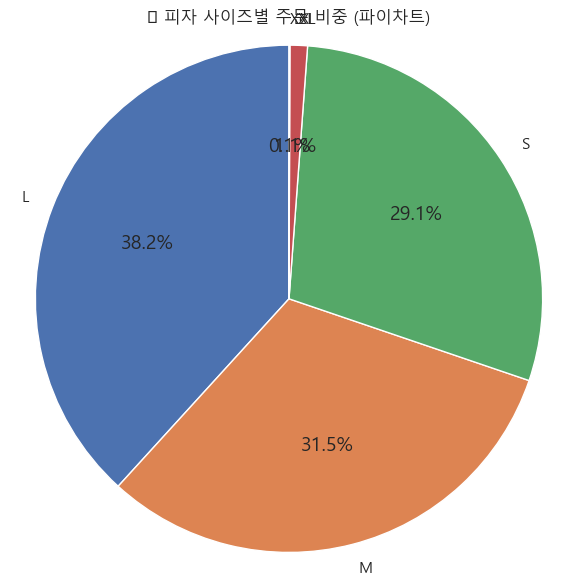

C:\Users\jun09\AppData\Local\Temp\ipykernel_2604\671615140.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_quantity, x='피자 사이즈', y='주문 수량', palette='Set3')
C:\Users\jun09\AppData\Local\Temp\ipykernel_2604\671615140.py:24: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\jun09\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


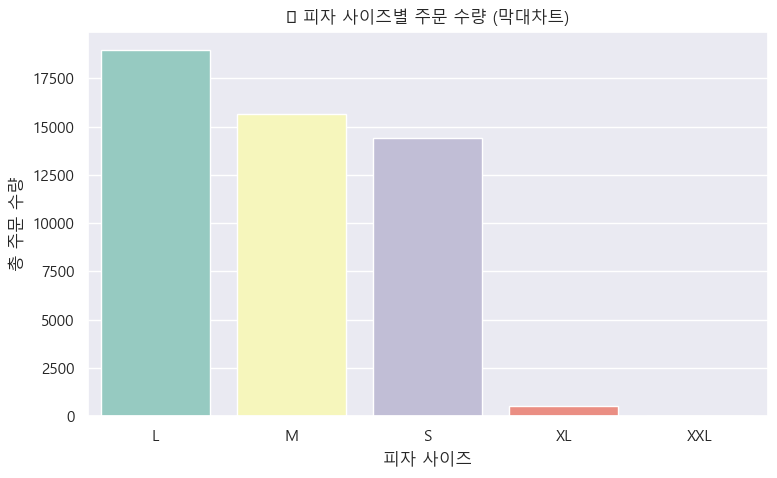

In [29]:
# 1. 피자 사이즈별 총 주문 수량 계산 및 정렬
size_quantity = df.groupby('피자 사이즈')['주문 수량'].sum().reset_index()
size_quantity = size_quantity.sort_values(by='주문 수량', ascending=False)

# 2. 파이차트: 사이즈별 비중
plt.figure(figsize=(6, 6))
plt.pie(
    size_quantity['주문 수량'],
    labels=size_quantity['피자 사이즈'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('📐 피자 사이즈별 주문 비중 (파이차트)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. 막대차트: 사이즈별 주문 수량
plt.figure(figsize=(8, 5))
sns.barplot(data=size_quantity, x='피자 사이즈', y='주문 수량', palette='Set3')
plt.title('📐 피자 사이즈별 주문 수량 (막대차트)')
plt.xlabel('피자 사이즈')
plt.ylabel('총 주문 수량')
plt.tight_layout()
plt.show()


가격 구간	총 주문 수량	비중
중가 ($15~$19.99)	17,986	37.0%
저가 (≤ $14.99)	16,318	33.6%
고가 (≥ $20)	15,270	29.4%

인사이트:
가격대가 고르게 분포됨 → 고객층 다양

중가 라인은 매출 안정화, 저가는 고객 유입, 고가는 마진 확보

세 가지 라인을 전략적으로 분화하여 포지셔닝 필요

In [30]:
# 피자 종류별 주문 수량 집계
category_quantity = df.groupby('피자 종류')['주문 수량'].sum().reset_index()

# 주문 수량 기준 내림차순 정렬
category_quantity = category_quantity.sort_values(by='주문 수량', ascending=False)

# 표 출력
print(category_quantity.to_string(index=False))


  피자 종류  주문 수량
Classic  14888
Supreme  11987
 Veggie  11649
Chicken  11050


C:\Users\jun09\AppData\Local\Temp\ipykernel_2604\21263376.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_quantity, x='피자 종류', y='주문 수량', palette='Set2')
C:\Users\jun09\AppData\Local\Temp\ipykernel_2604\21263376.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\jun09\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


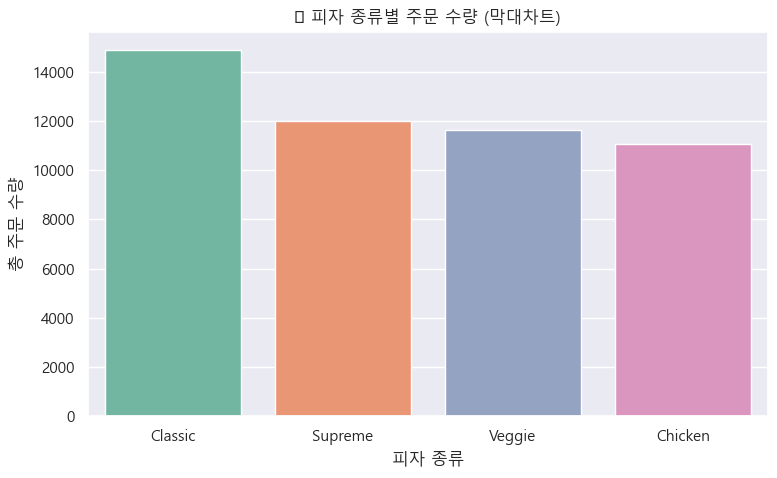

C:\Users\jun09\AppData\Local\Temp\ipykernel_2604\21263376.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()


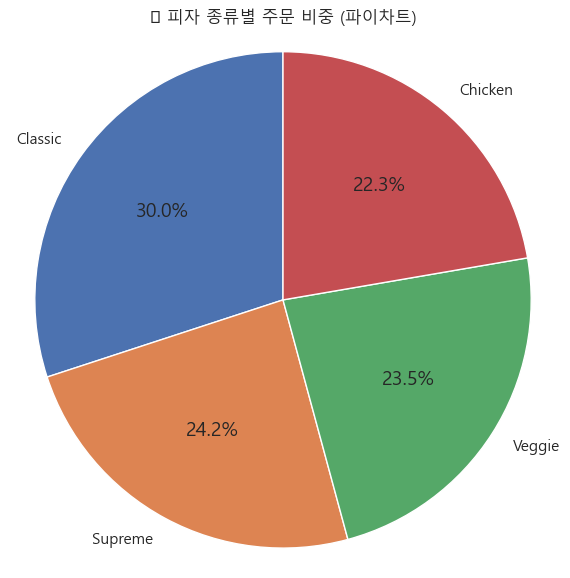

In [31]:
# 1. 피자 종류별 주문 수량 집계
category_quantity = df.groupby('피자 종류')['주문 수량'].sum().reset_index()
category_quantity = category_quantity.sort_values(by='주문 수량', ascending=False)

# 2. 막대차트
plt.figure(figsize=(8, 5))
sns.barplot(data=category_quantity, x='피자 종류', y='주문 수량', palette='Set2')
plt.title('📊 피자 종류별 주문 수량 (막대차트)')
plt.xlabel('피자 종류')
plt.ylabel('총 주문 수량')
plt.tight_layout()
plt.show()

# 3. 파이차트
plt.figure(figsize=(6, 6))
plt.pie(
    category_quantity['주문 수량'],
    labels=category_quantity['피자 종류'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('📊 피자 종류별 주문 비중 (파이차트)')
plt.axis('equal')
plt.tight_layout()
plt.show()

사이즈별 판매 비중
사이즈	총 주문 수량	비중 추정
L	18,956	39%
M	15,635	32%
S	14,403	29%

인사이트:
L 사이즈가 압도적 1위 → 가족, 친구와 나눠먹는 구성 선호

M, S도 비중 큼 → 1~2인 소비층도 충분히 존재

대형 프로모션은 L 사이즈 중심, 소형은 점심/1인 가구 타깃

In [ ]:
## 인기 피자 TOP 10 추출


# 피자 이름별 총 주문 수량 계산
pizza_top10 = df.groupby('피자 이름')['주문 수량'].sum().reset_index()

# 주문 수량 기준 내림차순 정렬 후 상위 10개 추출
pizza_top10 = pizza_top10.sort_values(by='주문 수량', ascending=False).head(10)

# TOP 10 피자 정보 추출 (피자 이름 기준으로 원본과 merge)
pizza_info = df.drop_duplicates(subset='피자 이름')[['피자 이름', '피자 종류', '피자 사이즈', '단가', '피자 재료 목록']]
pizza_top10_full = pd.merge(pizza_top10, pizza_info, on='피자 이름', how='left')

# 재료 수 컬럼 추가
pizza_top10_full['재료 수'] = pizza_top10_full['피자 재료 목록'].apply(lambda x: len(x.split(',')))

# 정리된 표 출력
print(pizza_top10_full.to_string(index=False))

                       피자 이름  주문 수량   피자 종류 피자 사이즈    단가                                                                                     피자 재료 목록  재료 수
    The Classic Deluxe Pizza   2453 Classic      M 16.00                                         Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon     5
  The Barbecue Chicken Pizza   2432 Chicken      S 12.75          Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce     6
          The Hawaiian Pizza   2422 Classic      M 13.25                                                     Sliced Ham, Pineapple, Mozzarella Cheese     3
         The Pepperoni Pizza   2418 Classic      L 15.25                                                                 Mozzarella Cheese, Pepperoni     2
      The Thai Chicken Pizza   2371 Chicken      L 20.75                           Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce     5
The California Chicken Pizza   2370 Chicken      L 20.75        

In [33]:
##단가/재료/사이즈/카테고리별 피자 효율 분석

# 피자 이름별 평균 주문 수량 계산
pizza_summary = df.groupby('피자 이름')['주문 수량'].mean().reset_index()

# 고유 피자 정보 병합 (중복 제거)
pizza_info_full = df.drop_duplicates(subset='피자 이름')[['피자 이름', '단가', '피자 사이즈', '피자 종류', '피자 재료 목록']]

# 재료 수 컬럼 추가
pizza_info_full['재료 수'] = pizza_info_full['피자 재료 목록'].apply(lambda x: len(x.split(',')))

# 병합: 피자별 요약 테이블
pizza_efficiency = pd.merge(pizza_summary, pizza_info_full, on='피자 이름', how='left')

# 주문 수량 기준 정렬
pizza_efficiency = pizza_efficiency.sort_values(by='주문 수량', ascending=False)

# 표 출력
print(pizza_efficiency.to_string(index=False))

                                     피자 이름    주문 수량    단가 피자 사이즈   피자 종류                                                                                          피자 재료 목록  재료 수
                        The Big Meat Pizza 1.056875 12.00      S Classic                                                Bacon, Pepperoni, Italian Sausage, Chorizo Sausage     4
                     The Five Cheese Pizza 1.036792 18.50      L  Veggie      Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic     6
              The California Chicken Pizza 1.029540 20.75      L Chicken               Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese     7
                     The Four Cheese Pizza 1.028108 17.95      L  Veggie Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic     5
                        The Sicilian Pizza 1.027027 20.25      L Supreme                  Coarse Sicilian Salami, T

피자 종류(카테고리)별 주문량
종류	주문 수량	특이점
Classic	14,888	스테디셀러
Supreme	11,987	프리미엄
Veggie	11,649	채식 수요 존재
Chicken	11,050	낮은 반응

인사이트:
**Classic(기본형)**이 여전히 1위 → 변형보단 기본에 충실한 피자 인기

Veggie가 Supreme과 유사한 수요 → 비건/건강식 라인 가능성 높음

Chicken 피자 리브랜딩 필요 → 이름 변경, 비주얼 보강 등 마케팅 필요



In [ ]:
## 어떤 토핑이 제일 많이 들어갔을까

from collections import Counter

# 모든 피자의 재료 목록을 하나의 리스트로 펼치기
all_ingredients = df['피자 재료 목록'].apply(lambda x: [i.strip() for i in x.split(',')])
flat_list = [ingredient for sublist in all_ingredients for ingredient in sublist]

# 재료별 등장 횟수 카운트
ingredient_counts = Counter(flat_list)

# DataFrame으로 정리
ingredient_df = pd.DataFrame(ingredient_counts.items(), columns=['재료명', '등장 횟수'])

# 등장 횟수 기준 내림차순 정렬
ingredient_df = ingredient_df.sort_values(by='등장 횟수', ascending=False).reset_index(drop=True)

# 표 출력
print(ingredient_df.to_string(index=False))


                       재료명  등장 횟수
                    Garlic  27422
                  Tomatoes  26601
                Red Onions  19547
               Red Peppers  16284
         Mozzarella Cheese  10333
                 Pepperoni  10300
                   Spinach  10012
                 Mushrooms   9624
                   Chicken   8443
                 Capocollo   6572
              Green Olives   6174
                Artichokes   5682
          Jalapeno Peppers   5643
             Green Peppers   5224
               Feta Cheese   4748
                 Pineapple   4685
                     Bacon   4227
             Asiago Cheese   3342
                  Cilantro   3341
                      Corn   3341
            Chipotle Sauce   3341
               Goat Cheese   3301
           Kalamata Olives   3269
            Fontina Cheese   3259
               Pesto Sauce   2893
                  Zucchini   2485
         Barbecued Chicken   2372
            Barbecue Sauce   2372
              

토핑 재료 등장 순위 TOP 10
재료명	등장 횟수	포지션
Garlic	27,422	거의 모든 피자 기본
Tomatoes	26,601	소스/재료 전방위 활용
Red Onions	19,547	중간 토핑
Red Peppers	16,284	상단 토핑
Mozzarella Cheese	10,333	핵심 치즈
Pepperoni	10,300	고기 토핑 대표

인사이트:
마늘, 토마토, 양파는 핵심 베이스 → 공급 안정성과 원가 관리 필요

페퍼로니, 치즈는 고급 피자 핵심 토핑

재료 등장 순서를 바탕으로 공통 베이스 피자 조합 (예: 마늘+토마토+치즈) 개발 가능

 종합 마케팅/제품 전략 제안
전략 영역	제안 내용
제품 개발	- 인기 재료 기반 베이스 조합 최적화
- Veggie 시리즈 라인 확장 (건강식/비건 타깃)
- M사이즈 중심 점심 전용 메뉴 개발
메뉴 포지션	- 중가 Classic & Veggie 중심
- 고가 프리미엄은 한정판/특별 테마로 고정비 방지
마케팅	- "건강한 채식 피자도 맛있다!" 테마
- "한 판이면 충분해" L사이즈 강조
- "우리의 베이스는 다르다" 핵심 재료 강조형 캠페인
공급전략	- Garlic, Tomatoes, Onion은 계약재배 or 대량구매로 원가 절감
- 페퍼로니/치즈는 프리미엄 라인 전용으로 분리 관리

In [45]:
# 1. 피자 이름별 단가 + 총 주문 수량
pizza_price_quantity_sorted.to_csv('피자_별_단가_및_총_주문수량.csv', index=False, encoding='utf-8-sig')

# 2. 가격 구간별 총 주문 수량
price_group_summary.to_csv('가격_구간별_총_주문수량.csv', index=False, encoding='utf-8-sig')

# 3. 토핑 재료 수 vs 총 주문 수량
ingredient_group_total.to_csv('재료수_별_총_주문수량.csv', index=False, encoding='utf-8-sig')

# 4. 피자 이름별 재료 수
ingredient_count_sorted.to_csv('피자_별_재료_수.csv', index=False, encoding='utf-8-sig')

# 5. 토핑 종류별 등장 횟수
topping_count_df.to_csv('토핑_종류별_등장횟수.csv', index=False, encoding='utf-8-sig')


In [42]:
# 피자 이름별로 토핑 재료 수 계산
ingredient_count = df.groupby('피자 이름')['피자 재료 목록'].first().apply(lambda x: len(x.split(','))).reset_index()
ingredient_count.columns = ['피자 이름', '재료 수']

# 재료 수 기준으로 정렬
ingredient_count_sorted = ingredient_count.sort_values(by='재료 수', ascending=False)


In [44]:
# 모든 피자의 재료 리스트 합치고, 재료별 등장 횟수 세기
from collections import Counter
topping_series = df['피자 재료 목록'].str.split(',').explode().str.strip()
topping_counts = Counter(topping_series)
topping_count_df = pd.DataFrame(topping_counts.items(), columns=['토핑', '등장 횟수']).sort_values(by='등장 횟수', ascending=False)
